In [28]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np

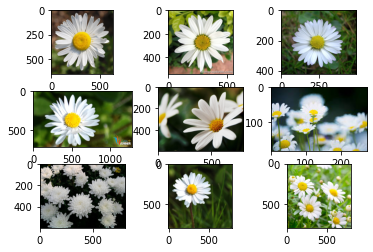

In [29]:
folder= '/content/drive/MyDrive/LoaiHoa/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'Cuc.'+ str(i) +'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [30]:
folder= '/content/drive/MyDrive/LoaiHoa/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('Cuc'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('MatTroi'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('ThuocDuoc'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('VanTho'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('Hoa_photos.npy', photos)
save('Hoa_labels.npy', labels)

(80, 150, 150, 3) (80,)


In [31]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150,150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 18, 18, 128)     

In [33]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=32,epochs=100, verbose=1)
model.save('Hoa_model.h5')

Epoch 1/100
3/3 [==============================] - 2s 48ms/step - loss: 1.2735 - accuracy: 0.8125
Epoch 2/100
3/3 [==============================] - 0s 48ms/step - loss: 0.4107 - accuracy: 0.9375
Epoch 3/100
3/3 [==============================] - 0s 46ms/step - loss: 0.2806 - accuracy: 0.9250
Epoch 4/100
3/3 [==============================] - 0s 45ms/step - loss: 0.1990 - accuracy: 0.9500
Epoch 5/100
3/3 [==============================] - 0s 45ms/step - loss: 0.3112 - accuracy: 0.9500
Epoch 6/100
3/3 [==============================] - 0s 46ms/step - loss: 0.0931 - accuracy: 0.9625
Epoch 7/100
3/3 [==============================] - 0s 47ms/step - loss: 0.0748 - accuracy: 0.9875
Epoch 8/100
3/3 [==============================] - 0s 45ms/step - loss: 0.0195 - accuracy: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 45ms/step - loss: 6.9427e-04 - accuracy: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 46ms/step - loss: 2.8071e-04 - accuracy: 1.0000
Epoch 11/10

[[0.28441036 0.24458653 0.24262816 0.22837499]]


'Cuc'

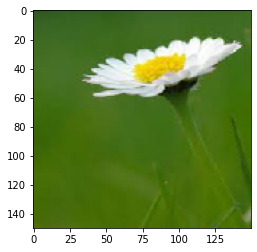

In [37]:
classes = ["Cuc","MatTroi","ThuocDuoc","VanTho"]
img = load_img('test1.jpg', target_size=(150,150))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.22699164 0.23219514 0.305182   0.23563121]]


'ThuocDuoc'

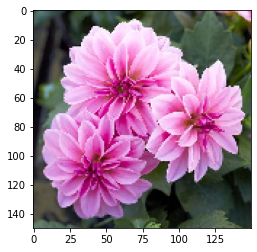

In [38]:
classes = ["Cuc","MatTroi","ThuocDuoc","VanTho"]
img = load_img('test2.jpg', target_size=(150,150))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]